In [2]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.makedirs('Images_Folder', exist_ok=True)
os.makedirs('Result_Folder', exist_ok=True)

Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 17430 Bytes 



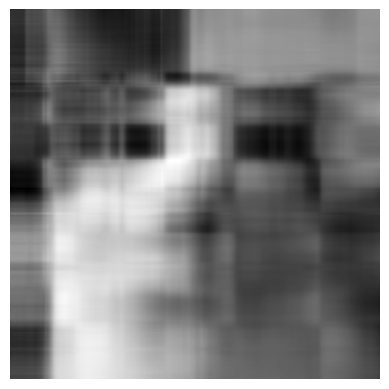

Compression Ratio: 35.9500693481276
MSE: 0.0032964443027334337 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 20418 Bytes 



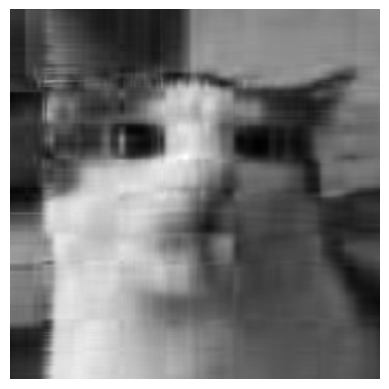

Compression Ratio: 17.9750346740638
MSE: 0.001274815702838146 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 21935 Bytes 



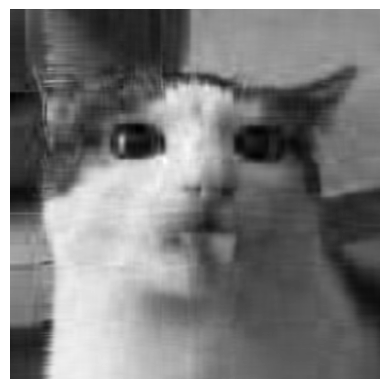

Compression Ratio: 11.983356449375867
MSE: 0.0006966711645102556 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 23396 Bytes 



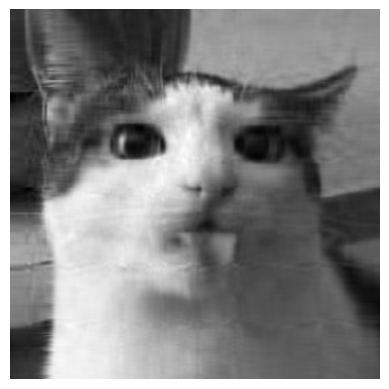

Compression Ratio: 8.9875173370319
MSE: 0.00044858340885292944 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 24203 Bytes 



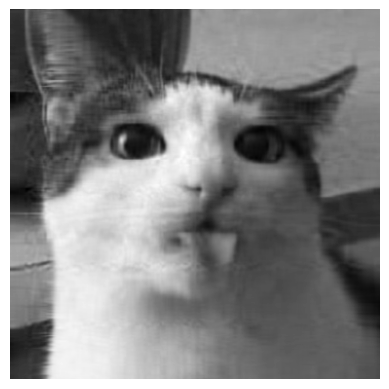

Compression Ratio: 7.1900138696255205
MSE: 0.0003194327594661129 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 24904 Bytes 



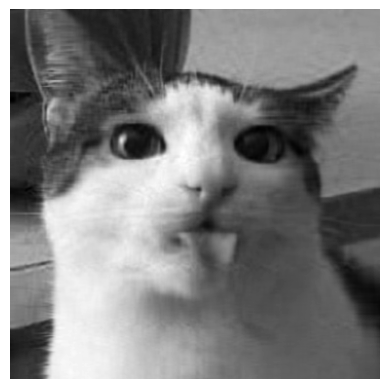

Compression Ratio: 5.991678224687933
MSE: 0.00023138926047570752 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 25683 Bytes 



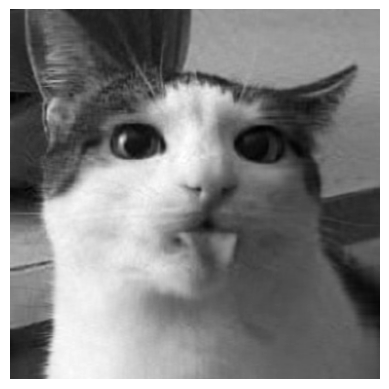

Compression Ratio: 5.135724192589657
MSE: 0.00017672986247364915 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 26233 Bytes 



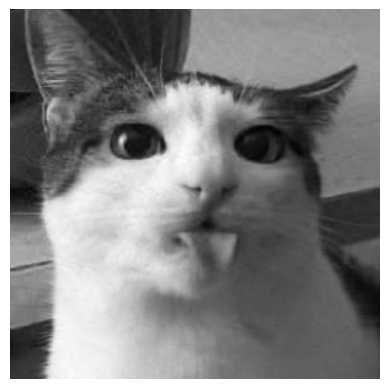

Compression Ratio: 4.49375866851595
MSE: 0.00013754278498234932 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 26640 Bytes 



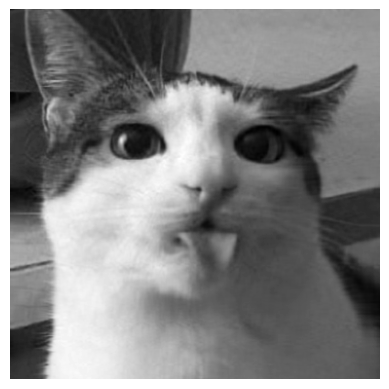

Compression Ratio: 3.9944521497919556
MSE: 0.00010813320824612591 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 26989 Bytes 



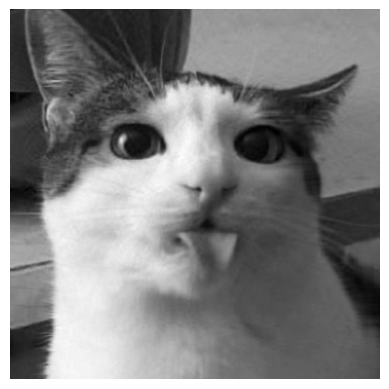

Compression Ratio: 3.5950069348127602
MSE: 8.64362881151136e-05 

-------------------------------------------------------


In [4]:
class SVD_Image_Compression_Processing:
    def __init__(self, Image_Name, Matrix_Approximation):
        self.Image_Name = Image_Name
        self.Original_Matrix = self.Convert_Image_To_Matrix(Image_Name)
        self.K = Matrix_Approximation
        if self.Original_Matrix is not False:
            self.Shape = np.shape(self.Original_Matrix)
            self.Result = self.Singular_Value_Decomposition()    
            self.Show_Image()
            self.Performance_Metrics()
        else:
            print(f"Picture not found!!!!")


    def Convert_to_PNG(self):
        for Image_File in os.listdir("Images_Folder"):
            if not Image_File.endswith(".png"):
                New_Image_File = os.path.splitext(Image_File)[0] + ".png"
                os.rename(
                    os.path.join("Images_Folder", Image_File),
                    os.path.join("Images_Folder", New_Image_File),
                )

    def Image_Size(self, Image_Path):
        return os.path.getsize(Image_Path)
    
    def Convert_Image_To_Matrix(self, Image_Name):
        self.Convert_to_PNG() 
        if Image_Name in os.listdir('Images_Folder'):
            Image_Path = os.path.join('Images_Folder', Image_Name)
            Image = cv2.imread(Image_Path)            
            print(f"Found the picture: {Image_Name} with size: {self.Image_Size(Image_Path)} Bytes")
            Gray_Image = np.zeros((Image.shape[0], Image.shape[1]))
            for Row in range(Image.shape[0]):
                for Col in range(Image.shape[1]):
                    Pixel = Image[Row, Col]
                    Gray_Pixel = Pixel[0] * 0.114 + Pixel[1] * 0.587 + Pixel[2] * 0.299
                    Normalization = Gray_Pixel / 255
                    Gray_Image[Row, Col] = Normalization
            return Gray_Image
        else:
            return False
    
    def Find_Eigenvalues_and_Eigenvectors(self, Matrix):
        Eigenvalues, Eigenvectors = np.linalg.eig(Matrix)
        return Eigenvalues, Eigenvectors

    def Sigma_Matrix(self, Matrix):
        Singular_Values = np.sqrt(np.abs(self.Find_Eigenvalues_and_Eigenvectors(Matrix)[0]))
        Sigma_Matrix = np.zeros(self.Shape, dtype='float_')
        for i in range(min(len(Singular_Values), self.Shape[0], self.Shape[1])):
            Sigma_Matrix[i, i] = Singular_Values[i]
        return Sigma_Matrix
    
    def Singular_Value_Decomposition(self):
        A = self.Original_Matrix
        AtA = np.matmul(A.T, A)
        U = np.zeros((self.Shape[0], self.K), dtype='float_')
        D = self.Sigma_Matrix(AtA)
        V = self.Find_Eigenvalues_and_Eigenvectors(AtA)[1]
        
        for Column in range(self.K):
            U[:, Column] = np.matmul(A, V[:, Column]) / D[Column, Column]
        Result = np.matmul(U[:, :self.K], D[:self.K, :self.K]) @ V[:, :self.K].T
        
        return Result

    def Show_Image(self):
        Img_Array = np.clip(self.Result * 255, 0, 255).astype(np.uint8)
        Filename = f"{self.K}_{self.Image_Name}.jpg"
        Result_Path = os.path.join('Result_Folder', Filename) 
        cv2.imwrite(Result_Path, Img_Array)    
        Img = Image.fromarray(Img_Array)   
        print(f'Image size after compression: {self.Image_Size(Result_Path)} Bytes \n')
        
        sns.set_theme(style = 'ticks')
        plt.imshow(Img, cmap='gray')
        plt.axis('off')
        plt.show()
        
    def Performance_Metrics(self):
        Compression_Ratio = (self.Shape[0]*self.Shape[1]) / (self.K*(self.Shape[0] + self.Shape[1] + 1))
        print(f'Compression Ratio: {Compression_Ratio}')
        MSE = np.sum(np.square(self.Original_Matrix - self.Result))/(self.Shape[0]*self.Shape[1])
        print(f'MSE: {MSE} \n')
        print('-------------------------------------------------------')

if __name__ == '__main__':
    for Num in range(4, 51):
        if Num % 5 == 0:
            SVD_Image_Compression_Processing('Cute Cat.png', Num)
